In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer as tf_idf
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
nltk.download(['punkt', 'stopwords'])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Advait\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Advait\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
ord('a')

97

#### 1. EDA

In [3]:
from Lab1_Pipeline import ReturnCleaned


df_new = ReturnCleaned(CountVectorizer())

ham = df_new.drop(columns=['sms_text']).groupby('class_labels').sum().loc['ham']
print(ham.idxmax(), ham.max())

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Advait\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Advait\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


gt 318


In [4]:
spam = df_new.drop(columns=['sms_text']).groupby('class_labels').sum().loc['spam']
print(spam.idxmax(), spam.max())

call 355


### SVM with BoW and TF-IDF

In [5]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X = df_new.drop(columns=['sms_text', 'class_labels']).values
y = df_new['class_labels'].map({'ham': 0, 'spam': 1}).values
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.7)

In [6]:
svm_model = SVC(kernel='rbf').fit(xtrain, ytrain)

In [7]:
from sklearn.metrics import f1_score, accuracy_score

In [8]:
print(accuracy_score(svm_model.predict(xtrain), ytrain), f1_score(svm_model.predict(xtrain), ytrain))
print(accuracy_score(svm_model.predict(xtest), ytest), f1_score(svm_model.predict(xtest), ytest))

0.992818671454219 0.9719626168224299
0.9523199179697514 0.786697247706422


In [9]:
import wordcloud

In [10]:
tokens = df_new.columns.to_list()
tokens.remove('class_labels')
tokens.remove('sms_text')

In [11]:
cloud_data = ' '.join(word for word in tokens)

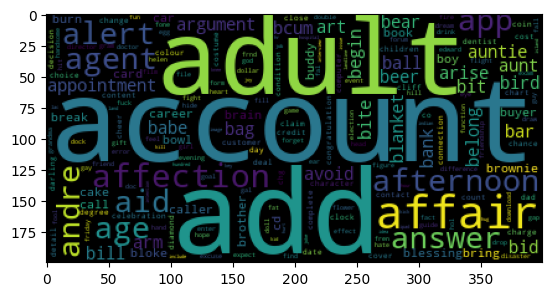

In [12]:
cloud = wordcloud.WordCloud().generate(cloud_data)
plt.imshow(cloud)

In [13]:
df2 = ReturnCleaned(tf_idf())
X_dfIDF = df2.drop(columns=['sms_text', 'class_labels']).values
y_dfIDF = df2['class_labels'].map({'ham': 0, 'spam': 1}).values

xtrain2, xtest2, ytrain2, ytest2 = train_test_split(X_dfIDF, y_dfIDF, test_size=0.7)

In [14]:
svm_model_tfidf = SVC(kernel='sigmoid').fit(xtrain2, ytrain2)

In [15]:
df_unclean = pd.read_csv('./spam.csv', encoding='ISO-8859-1')[['v1', 'v2']]
df_unclean.columns = ['class_labels', 'sms_text']

vect = tf_idf()
vec_unclean = vect.fit_transform(df_unclean['sms_text']).toarray()

df_unclean = pd.concat([df_unclean.reset_index(), pd.DataFrame(data=vec_unclean, columns= vect.get_feature_names_out(df_unclean['sms_text'])).reset_index()], axis=1)
df_unclean.drop(columns=['index', 'level_0'], inplace=True)

In [16]:
X_unclean = df2.drop(columns=['sms_text', 'class_labels']).values
y_unclean = df2['class_labels'].map({'ham': 0, 'spam': 1}).values

xtrain_unclean, xtest_unclean, ytrain_unclean, ytest_unclean = train_test_split(X_unclean, y_unclean, test_size=0.7)

In [17]:
svm_on_unclean_data = SVC()
svm_on_unclean_data.fit(xtrain_unclean, ytrain_unclean)

SVC()

In [18]:
print(accuracy_score(svm_model.predict(xtrain), ytrain), f1_score(svm_model.predict(xtrain), ytrain))
print(accuracy_score(svm_model.predict(xtest), ytest), f1_score(svm_model.predict(xtest), ytest))

0.992818671454219 0.9719626168224299
0.9523199179697514 0.786697247706422


In [19]:
print(accuracy_score(svm_model_tfidf.predict(xtrain2), ytrain2), f1_score(svm_model_tfidf.predict(xtrain2), ytrain2))
print(accuracy_score(svm_model_tfidf.predict(xtest2), ytest2), f1_score(svm_model_tfidf.predict(xtest2), ytest2))

0.9856373429084381 0.9420289855072463
0.963855421686747 0.8517350157728707


In [20]:
print(accuracy_score(svm_on_unclean_data.predict(xtrain_unclean), ytrain_unclean), f1_score(svm_on_unclean_data.predict(xtrain_unclean), ytrain_unclean))
print(accuracy_score(svm_on_unclean_data.predict(xtest_unclean), ytest_unclean), f1_score(svm_on_unclean_data.predict(xtest_unclean), ytest_unclean))

0.992818671454219 0.9730941704035875
0.9497564726993079 0.772093023255814
